In [39]:
import pandas as pd

In [40]:
train = pd.read_csv('train_data.csv', )
test = pd.read_csv('test_data.csv')

In [41]:
print("Columns in train dataframe:")
print(train.columns)
print("\nData types in train dataframe:")
print(train.dtypes)

print("\nColumns in test dataframe:")
print(test.columns)
print("\nData types in test dataframe:")
print(test.dtypes)

Columns in train dataframe:
Index(['Ship Mode', 'Segment', 'Region', 'Sub-Category', 'Sales', 'Discount',
       'Quarter'],
      dtype='object')

Data types in train dataframe:
Ship Mode        object
Segment          object
Region           object
Sub-Category     object
Sales           float64
Discount        float64
Quarter           int64
dtype: object

Columns in test dataframe:
Index(['Ship Mode', 'Segment', 'Region', 'Sub-Category', 'Sales', 'Discount',
       'Quarter'],
      dtype='object')

Data types in test dataframe:
Ship Mode        object
Segment          object
Region           object
Sub-Category     object
Sales           float64
Discount        float64
Quarter           int64
dtype: object


In [42]:
from sklearn.preprocessing import LabelEncoder

# # Encode categorical variables in the train dataframe
# Initialize the LabelEncoder
le = LabelEncoder()
# Encode categorical variables in the train dataframe
categorical_columns = ['Ship Mode', 'Segment', 'Region', 'Sub-Category', 'Quarter']
train_encoded = pd.get_dummies(train, columns=categorical_columns)

# Encode categorical variables in the test dataframe
test_encoded = pd.get_dummies(test, columns=categorical_columns)

print(train_encoded.head())
print(test_encoded.head())

      Sales  Discount  Ship Mode_First Class  Ship Mode_Same Day  \
0  2573.820       0.0                  False               False   
1    76.728       0.6                  False               False   
2    51.940       0.0                  False               False   
3     9.940       0.0                   True               False   
4   545.940       0.0                  False               False   

   Ship Mode_Second Class  Ship Mode_Standard Class  Segment_Consumer  \
0                   False                      True             False   
1                   False                      True              True   
2                   False                      True             False   
3                   False                     False              True   
4                    True                     False              True   

   Segment_Corporate  Segment_Home Office  Region_Central  ...  Region_South  \
0              False                 True           False  ...          

#### Original Dataframes
- **train**: Contains the original training data with categorical variables such as `Ship Mode`, `Segment`, `Region`, `Sub-Category`, and `Month`.
- **test**: Contains the original test data with similar categorical variables.

#### Encoded Dataframes
- **train_encoded**: The training dataframe after encoding categorical variables.
- **test_encoded**: The test dataframe after encoding categorical variables.

#### Encoding Process
1. **Convert to Category**: The `Quarter` column was converted to a categorical type.
2. **One-Hot Encoding**: We applied one-hot encoding to the categorical columns. This process creates new binary columns for each category level in the original categorical columns.

For example, the `Ship Mode` column with categories like `First Class`, `Same Day`, `Second Class`, and `Standard Class` was transformed into four new binary columns:
- `Ship Mode_First Class`
- `Ship Mode_Same Day`
- `Ship Mode_Second Class`
- `Ship Mode_Standard Class`


In [43]:
print(train_encoded.dtypes)

Sales                       float64
Discount                    float64
Ship Mode_First Class          bool
Ship Mode_Same Day             bool
Ship Mode_Second Class         bool
Ship Mode_Standard Class       bool
Segment_Consumer               bool
Segment_Corporate              bool
Segment_Home Office            bool
Region_Central                 bool
Region_East                    bool
Region_South                   bool
Region_West                    bool
Sub-Category_Bookcases         bool
Sub-Category_Chairs            bool
Sub-Category_Furnishings       bool
Sub-Category_Tables            bool
Quarter_1                      bool
Quarter_2                      bool
Quarter_3                      bool
Quarter_4                      bool
dtype: object


In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

class RandomForestModel:
    def __init__(self):
        self.model = RandomForestRegressor()
    
    def fit(self, X, y):
        self.model.fit(X, y)
    
    def predict(self, X):
        return self.model.predict(X)
    
    def evaluate(self, X, y):
        y_pred = self.predict(X)
        mse = mean_squared_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        return mse, r2

# Define the features and target variable
X_train = train_encoded.drop(columns=['Sales'])
y_train = train_encoded['Sales']

# Initialize the model
sales_model = RandomForestModel()

# Fit the model
sales_model.fit(X_train, y_train)

# Evaluate the model
mse, r2 = sales_model.evaluate(X_train, y_train)

print(f"R-squared: {r2}")

# Save the model
import joblib
joblib.dump(sales_model, 'sales_model.pkl')

R-squared: 0.6214280582074188


['sales_model.pkl']

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

class SalesPredictionModel:
    def __init__(self):
        self.scaler = tf.keras.layers.Normalization()
        self.model = Sequential([
            self.scaler,
            Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
            Dense(64, activation='relu'),
            Dense(32, activation='relu'),
            Dense(1)
        ])
        self.model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    def fit(self, X, y, epochs=50, batch_size=32, validation_split=0.2):
        self.scaler.adapt(X)
        self.history = self.model.fit(X, y, epochs=epochs, batch_size=batch_size, validation_split=validation_split)

    def evaluate(self, X, y):
        mse, _ = self.model.evaluate(X, y)
        return mse

    def predict(self, X):
        return self.model.predict(X)

# Define the features and target variable
X_train = train_encoded.drop(columns=['Sales'])
y_train = train_encoded['Sales']

# Convert input data to float32
X_train_np = X_train.to_numpy().astype('float32')
y_train_np = y_train.to_numpy().astype('float32')

# Initialize the model
sales_nn_model = SalesPredictionModel()

# Fit the model
sales_nn_model.fit(X_train_np, y_train_np)

# Evaluate the model
mse = sales_nn_model.evaluate(X_train_np, y_train_np)
print(f"R-squared: {1 - mse/y_train_np.var()}")

Epoch 1/50
43/43 [==============================] - 0s 3ms/step - loss: 403994.0625 - mean_squared_error: 403994.0625 - val_loss: 269519.1875 - val_mean_squared_error: 269519.1875
Epoch 2/50
43/43 [==============================] - 0s 928us/step - loss: 382597.2812 - mean_squared_error: 382597.2812 - val_loss: 229093.1719 - val_mean_squared_error: 229093.1719
Epoch 3/50
43/43 [==============================] - 0s 892us/step - loss: 303217.4062 - mean_squared_error: 303217.4062 - val_loss: 146066.8125 - val_mean_squared_error: 146066.8125
Epoch 4/50
43/43 [==============================] - 0s 974us/step - loss: 229543.2500 - mean_squared_error: 229543.2500 - val_loss: 131496.8281 - val_mean_squared_error: 131496.8281
Epoch 5/50
43/43 [==============================] - 0s 950us/step - loss: 219334.6562 - mean_squared_error: 219334.6562 - val_loss: 129034.2266 - val_mean_squared_error: 129034.2266
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 214443.5156 - mean_s

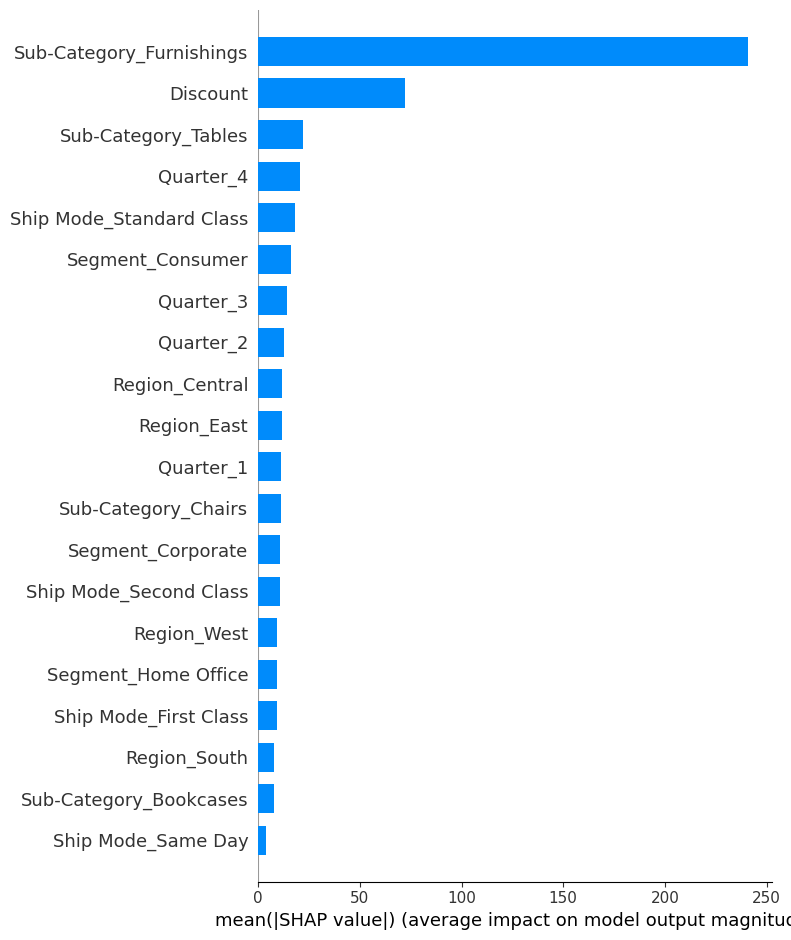

In [47]:
import shap

# Extract the underlying RandomForestRegressor model
rf_model = sales_model.model

explainer = shap.Explainer(rf_model)
shap_values = explainer(X_train)

# Create a bar plot of the SHAP values
shap.summary_plot(shap_values, X_train, plot_type="bar")